# 1.Busines Case:- To predict the flight ticket prices based on given  data

## 2.IMPORT LIABRARIES

In [127]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

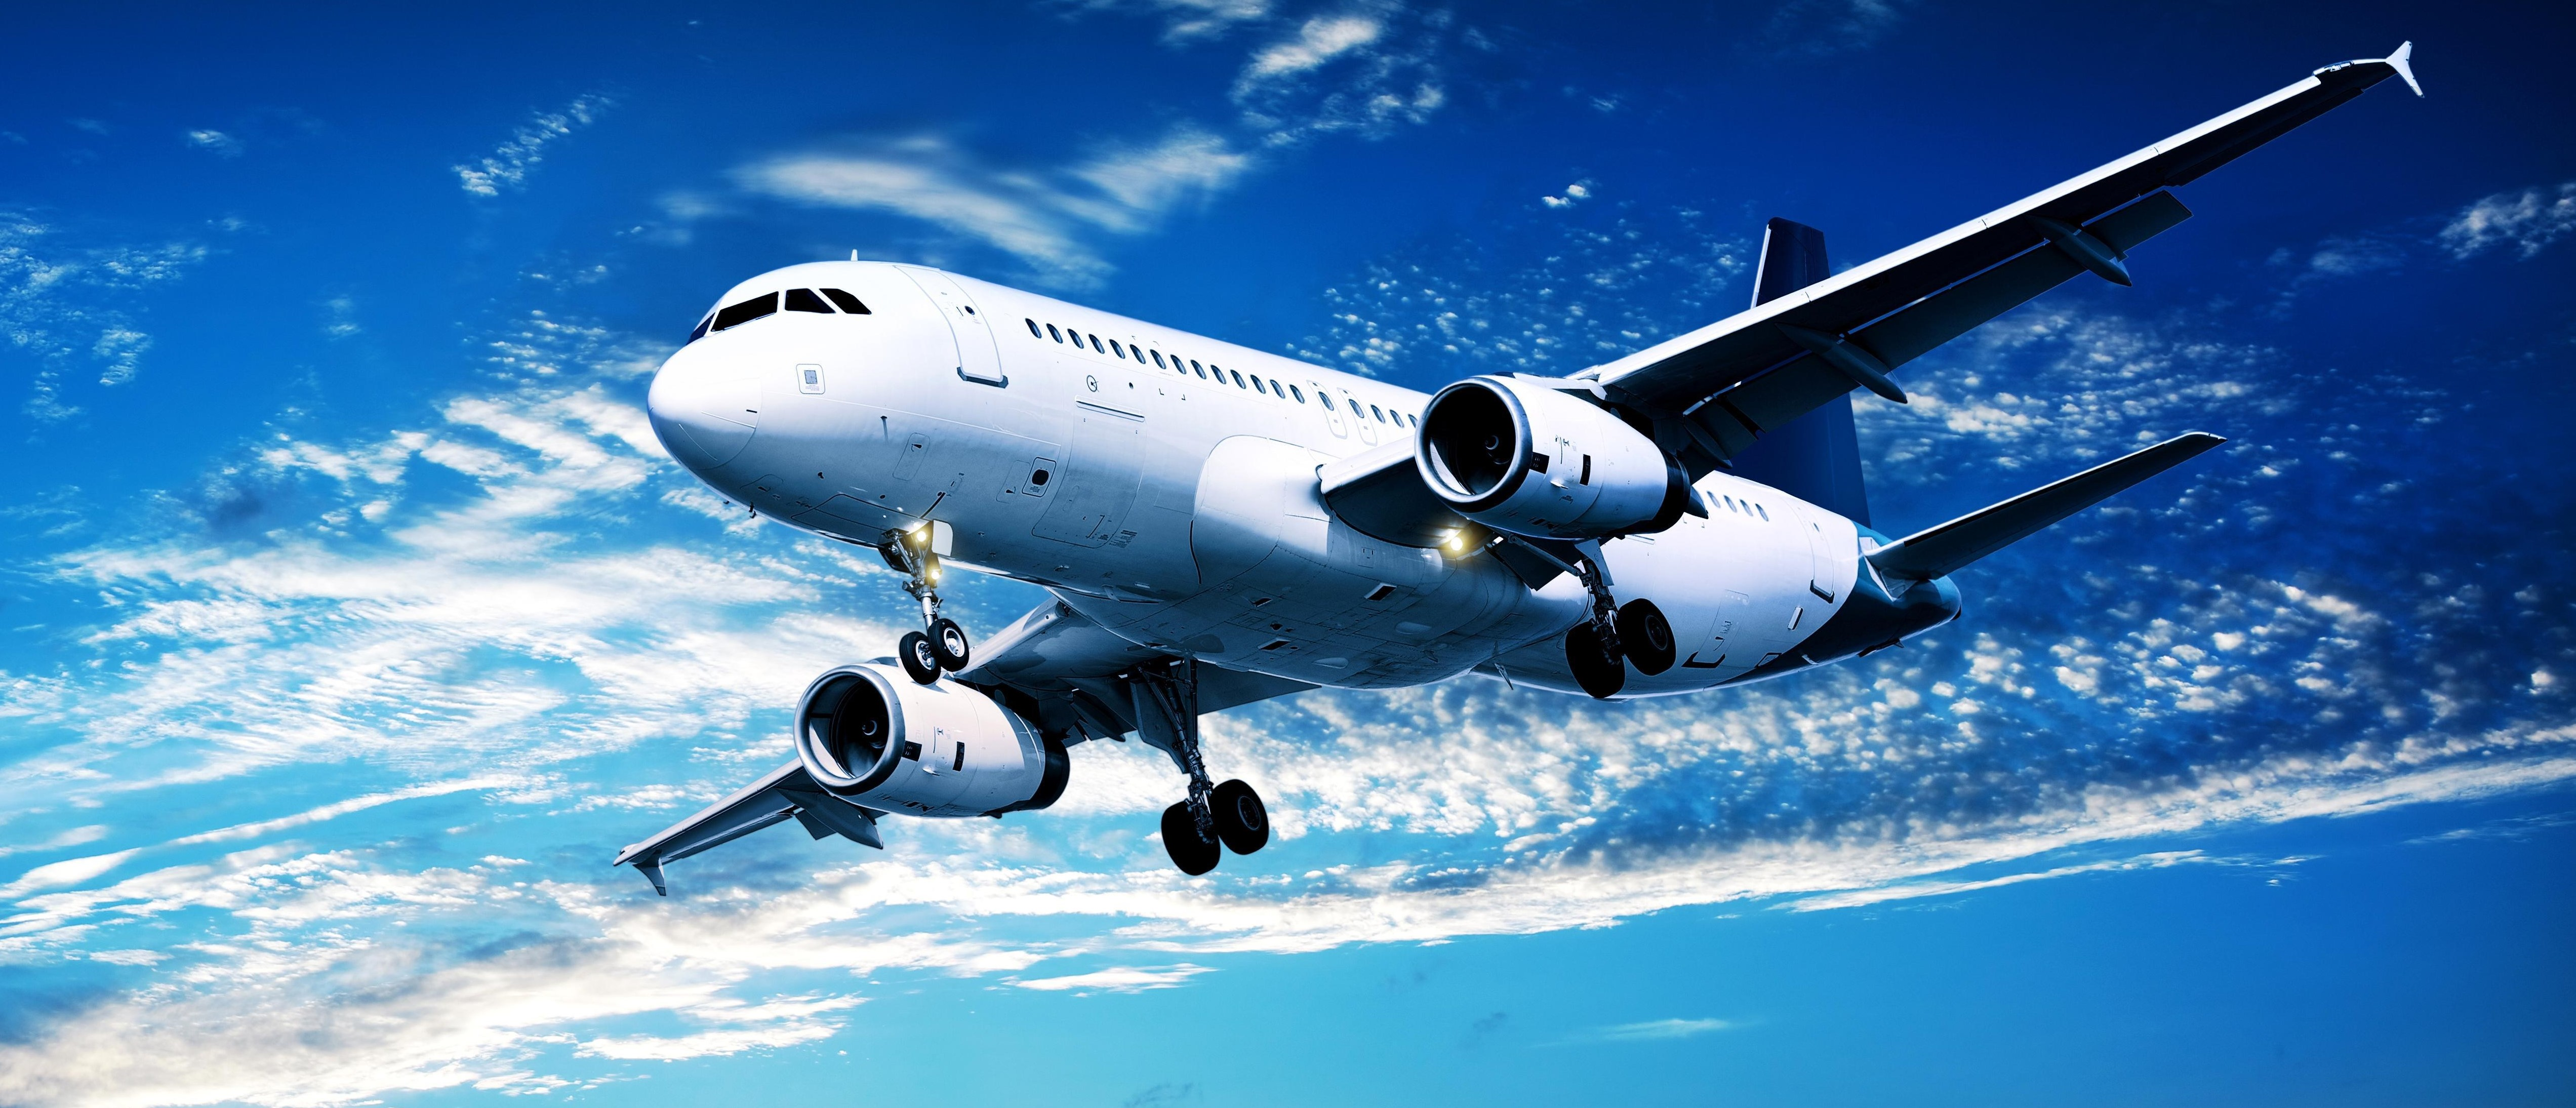

In [128]:
from IPython.display import Image
Image("flighta.jpg")

## 3.LOAD DATA

In [129]:
#import data
data=pd.read_excel("Flight_Fare.xlsx")

In [130]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


## 4.DOMAIN ANALYSIS

1.Airline:
This column represents the name of the airline company operating the flight.

2.Date_of_Journey:
This column indicates the date when the journey is scheduled to begin.

3.Source:
The starting location or city from which the flight originates.

4.Destination:
The final destination or city where the flight is scheduled to arrive.

5.Route:
The sequence of connecting cities or airports that the flight will pass through from source to destination.

6.Dep_Time:
The departure time of the flight from the source airport.

7.Arrival_Time:
The expected arrival time of the flight at the destination airport.

8.Duration:
The duration of the flight, indicating the time taken to travel from source to destination.

9.Total_Stops:
The number of stops or layovers during the journey. It can be a direct flight or have one or more layovers.

10.Additional_Info:
Any additional information or notes about the flight that might not be covered by other columns. This could include special services, amenities, or instructions.

11.Price:
The fare or price of the flight ticket. This is the target variable for prediction in your analysis.







## 5.BASIC CHECKS

In [131]:
# to see the first five data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [132]:
# to see the bottom five data
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [133]:
# to see the number of rows and columns
data.shape

(10683, 11)

In [134]:
# to see the size of the data
data.size

117513

In [135]:
# name of all the columns 
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [136]:
# to see the data types of all the columns
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [137]:
# to see the statistical parameters of categorical columns
data.describe(include=["O"])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [138]:
# to see the statistical parameters of numerical columns
data.describe(include=["int64"])

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 6.EXPLORATORY DATA ANALYSIS



### UNIVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

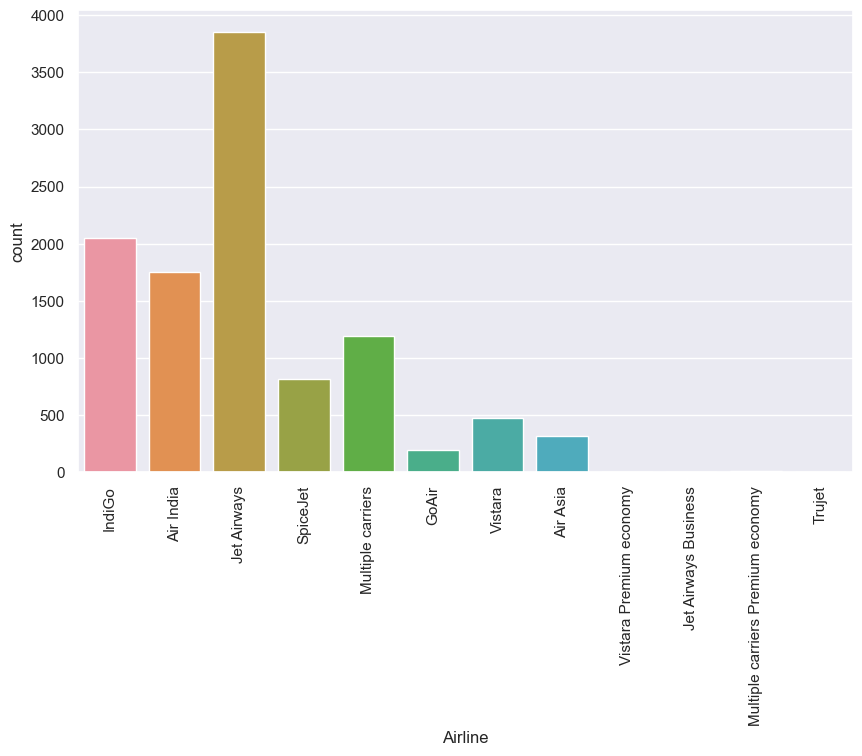

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(x="Airline",data=data)
plt.xticks(rotation=90)

### Insights
* Jet Airways is the costliest among all the flights
* Jet Airways has the highest share followed by Indigo

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

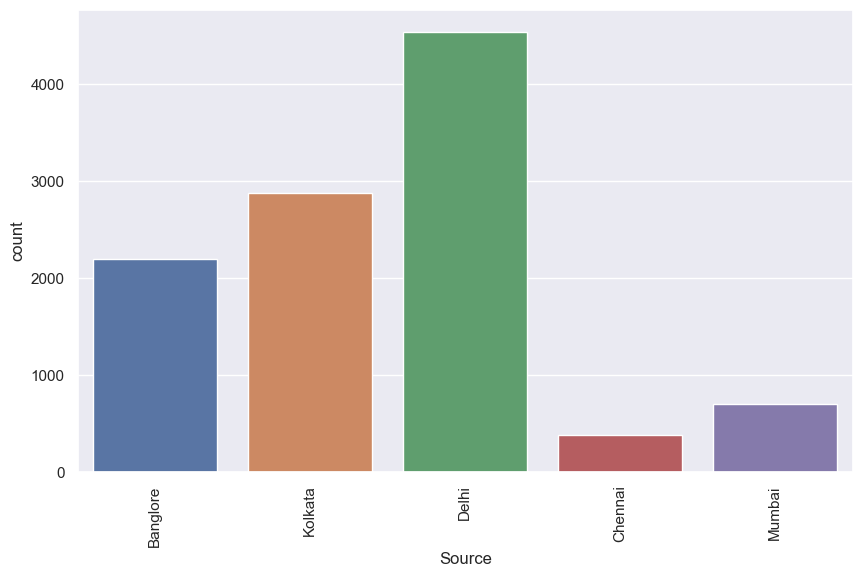

In [141]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source",data=data)
plt.xticks(rotation=90)

### Insights

* Delhi has highest take off or originating point for all the flights followed by Kolkata and Banglore respectively.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

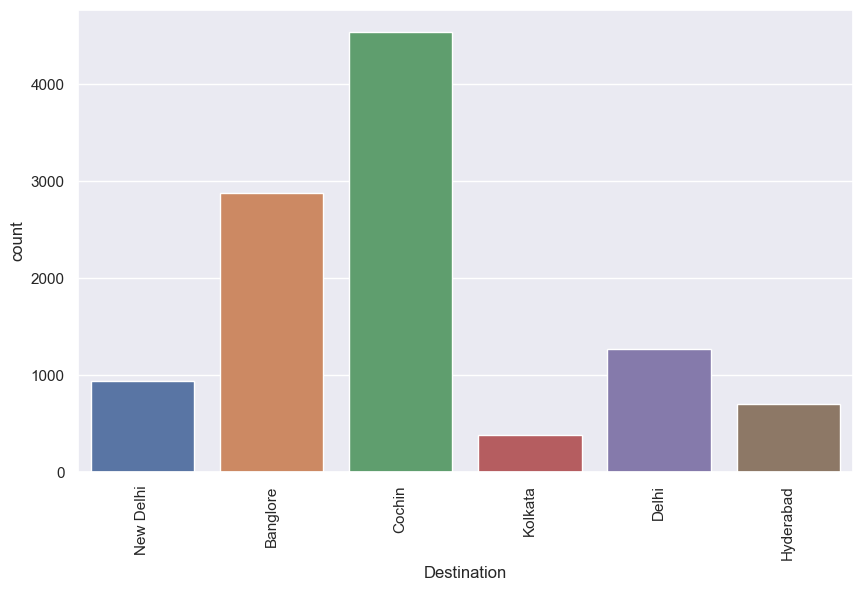

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=data)
plt.xticks(rotation=90)

### Insights

* Cochin has the highest landing or arrival of the flights from different places followed by Banglore



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

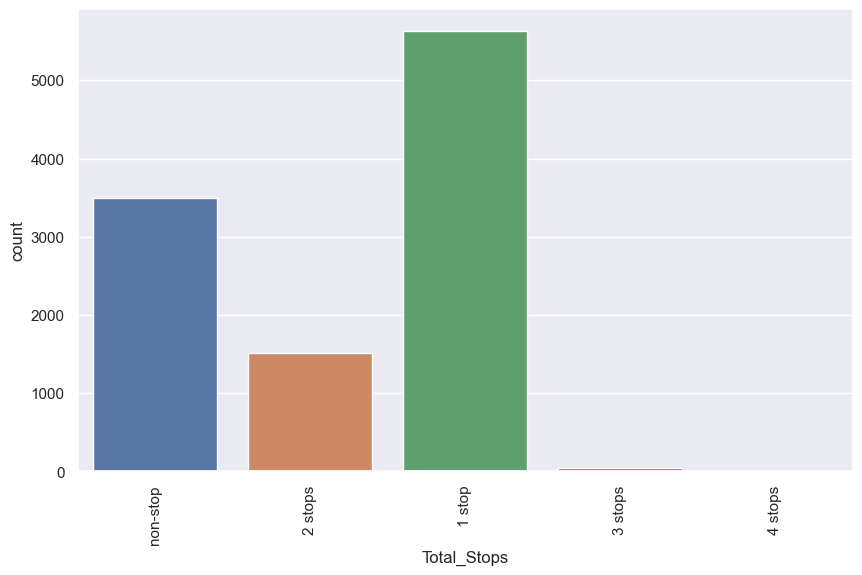

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)
plt.xticks(rotation=90)

### Insights

* Most flights have single stop in between taking off and landing at the destination followed by non-stop.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

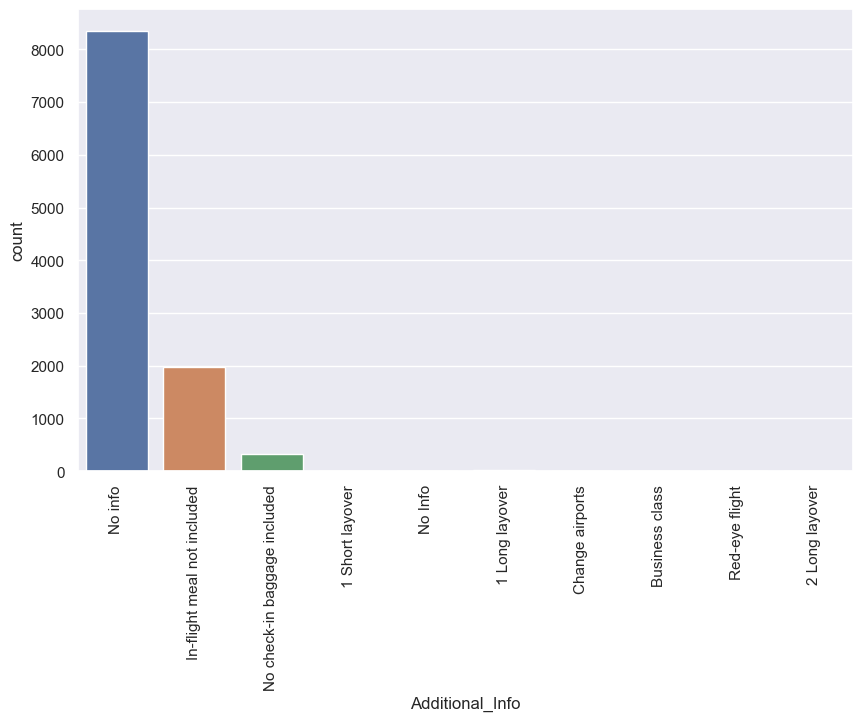

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info",data=data)
plt.xticks(rotation=90)

### Insights

* Most of the flights do not have any extra information 
* There are few flights with extra information of "in-flight meal not included" 

In [145]:
# sweetviz is used for univariate 
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [146]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("my_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights

* The majority of prices are within the 20,000 range, but there are some outliers.

* The most frequent airline is Jet Airways. However, Jet Airways Business has a   much higher average price than the other lines.


* The most flights depart from Delhi, and the average price is the highest.


* Cochin is the most heavily trafficked destination. New Delhi, on the other hand, has the highest average price.


* A little more than half of the flights make single stop between the origin and destination, around one-third is direct flight.


### BYVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

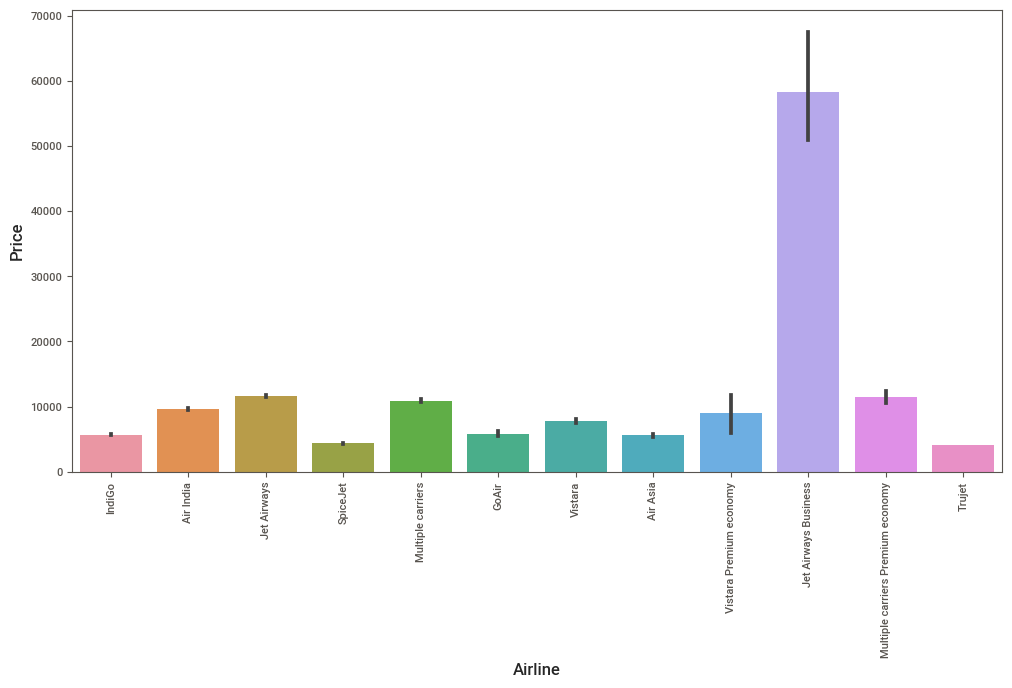

In [147]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=data)
plt.xticks(rotation=90)

### Insights

* Jet Airways Business has the highest price when compared to others.

## 7.DATA PREPROCESSING

### Null Value

In [148]:
# check the null value present in the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Insights

* There are only two null values

* 1 in Route

* 1 in Total_Stops

In [149]:
# We drop the null value 
data.dropna(inplace=True)

In [150]:
# we have removed one row with null value
data.shape 

(10682, 11)

In [151]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Extracting Date and Month from Date of Journey column

### Converting into Datetime:

* We are going to extract the date and month from the date of the journey .
* For this, we require pandas to_datetime to convert the object data type to DateTime data type .
* dt.day the method will extract only the day from the date.
* dt.month the method will extract only the month of that date.



### Date

In [152]:
data["journey_Date"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.day

### Month

In [153]:
data["journey_Month"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [154]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


* Since we have extracted Date of Journey column into Date & Month, Now we can drop it as Original Date of Journey column is of no use.


In [155]:
# droping date of journey column as we have allready extracted data and month
data.drop(['Date_of_Journey'],axis=1,inplace=True)


* Departure time is when a plane leaves the Source .
* Similar to Date of Journey we can extract values from
  Departure Time
* So we will be extracting Hour & Minutes from Departure Time
  Column


### Hours

In [156]:
# Extracting Hours
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour #pd.to_datetime


### Minutes

In [157]:
#Extracting minutes
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [158]:
#Now we will drop the dep_time as we dont need it anymore
data.drop(['Dep_Time'],axis=1,inplace=True)

In [159]:
data.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


* Arrival time is when a plane reaches the destination.
* Similar to Date of Journey we can extract values from Arrival
  Time
* So we will be extracting Hour & Minutes from Arrival Time
  Column


In [160]:
# Extracting Hours
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour #pd.to_datetime

#Extracting minutes
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
data.drop(['Arrival_Time'],axis=1,inplace=True)


In [161]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


### “Duration” column:

* Here we are trying to extract the hours and minutes from the
  feature “duration”.


In [162]:
# Assigning and converting Duration column into list to extract hours and minutes seperately

duration = list(data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
             duration[i] = "0h " + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

* Adding “duration_hours” and “duration_mins” list to data frame and dropping the column “duration” from it.


In [163]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

#we will remove the Durtaion column
data.drop(['Duration'],axis=1,inplace=True)


In [164]:
data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


## Converting categorical columns to numerical using One Hot Encoder

In [165]:
cat_col=data.select_dtypes(include=["O"])
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


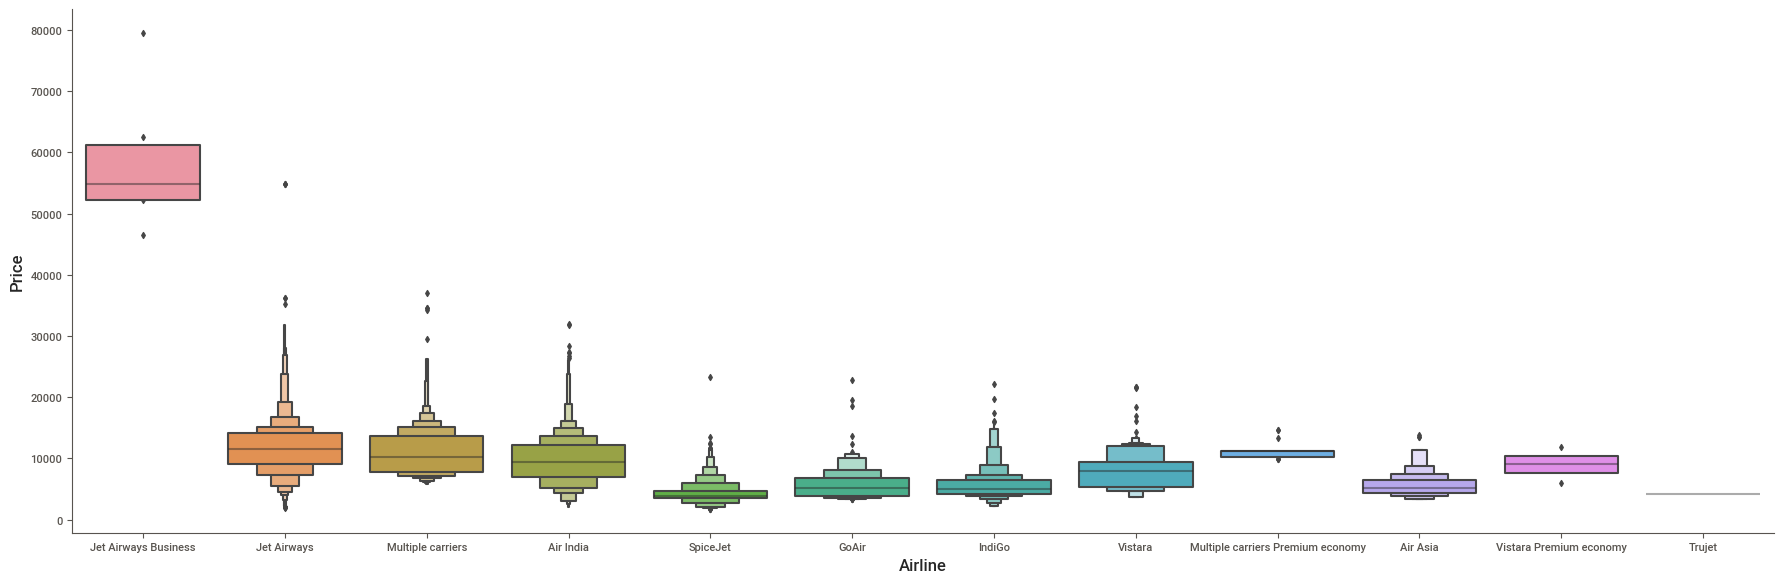

In [166]:
# Airline vs Price
sns.catplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

### Insights
* From the graph above we can understand that JetAirways has the highest price and rest are quite in the same range

In [167]:
data2=data.copy()

In [168]:
#OneHotEncoding 
df1=pd.get_dummies(data2["Airline"],drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(["Airline"],axis=1)


In [169]:
data2.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0


In [170]:
#OneHotEncoding 
df2=pd.get_dummies(data2["Source"],drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(["Source"],axis=1)


In [171]:
data2.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [172]:
#OneHotEncoding
df3=pd.get_dummies(data2["Destination"],drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(["Destination"],axis=1)


In [173]:
data2.head(4)

,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0


In [174]:
# droping column, because Additinal_info since 80 % has no information
# Route---> is related to no of stops
data2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [175]:
data2.head(5)

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<Axes: xlabel='Total_Stops', ylabel='count'>

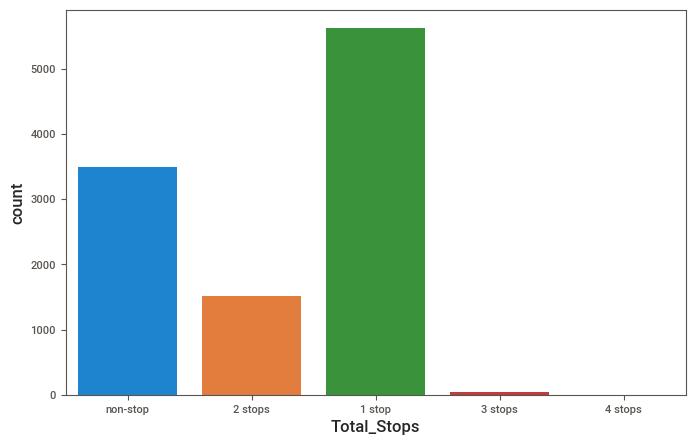

In [176]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="Total_Stops")

In [177]:
data2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [178]:
# Based on the observation from above countplot and value counts we can manualy encode the total_stop column

data2.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df=data2
df.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [179]:
x=df.drop("Price",axis=1)
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


## Scaling

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


## 8.FEATURE ENGINEERING

In [181]:
data2=df.iloc[0:10,0:10]
data2

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [182]:
data2.corr()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.415321,-0.639003,0.253185,-0.502264,0.405355,0.112469,0.088946,0.430101,-0.490055
Price,0.415321,1.000000,-0.659511,-0.366571,-0.333911,0.031325,-0.193463,-0.203835,0.703591,-0.542767
journey_Date,-0.639003,-0.659511,1.000000,0.267372,0.305646,-0.319999,-0.071263,-0.117263,-0.378853,0.487520
journey_Month,0.253185,-0.366571,0.267372,1.000000,-0.400946,-0.399323,0.166297,0.162142,-0.271248,-0.332520
Dep_hour,-0.502264,-0.333911,0.305646,-0.400946,1.000000,-0.020904,0.080281,0.201823,-0.438518,0.528181
Dep_min,0.405355,0.031325,-0.319999,-0.399323,-0.020904,1.000000,0.116379,0.322526,0.239471,0.304109
Arrival_hour,0.112469,-0.193463,-0.071263,0.166297,0.080281,0.116379,1.000000,0.573010,-0.393844,0.362001
Arrival_min,0.088946,-0.203835,-0.117263,0.162142,0.201823,0.322526,0.573010,1.000000,-0.134939,0.080203
Duration_hours,0.430101,0.703591,-0.378853,-0.271248,-0.438518,0.239471,-0.393844,-0.134939,1.000000,-0.585949
Duration_mins,-0.490055,-0.542767,0.487520,-0.332520,0.528181,0.304109,0.362001,0.080203,-0.585949,1.000000


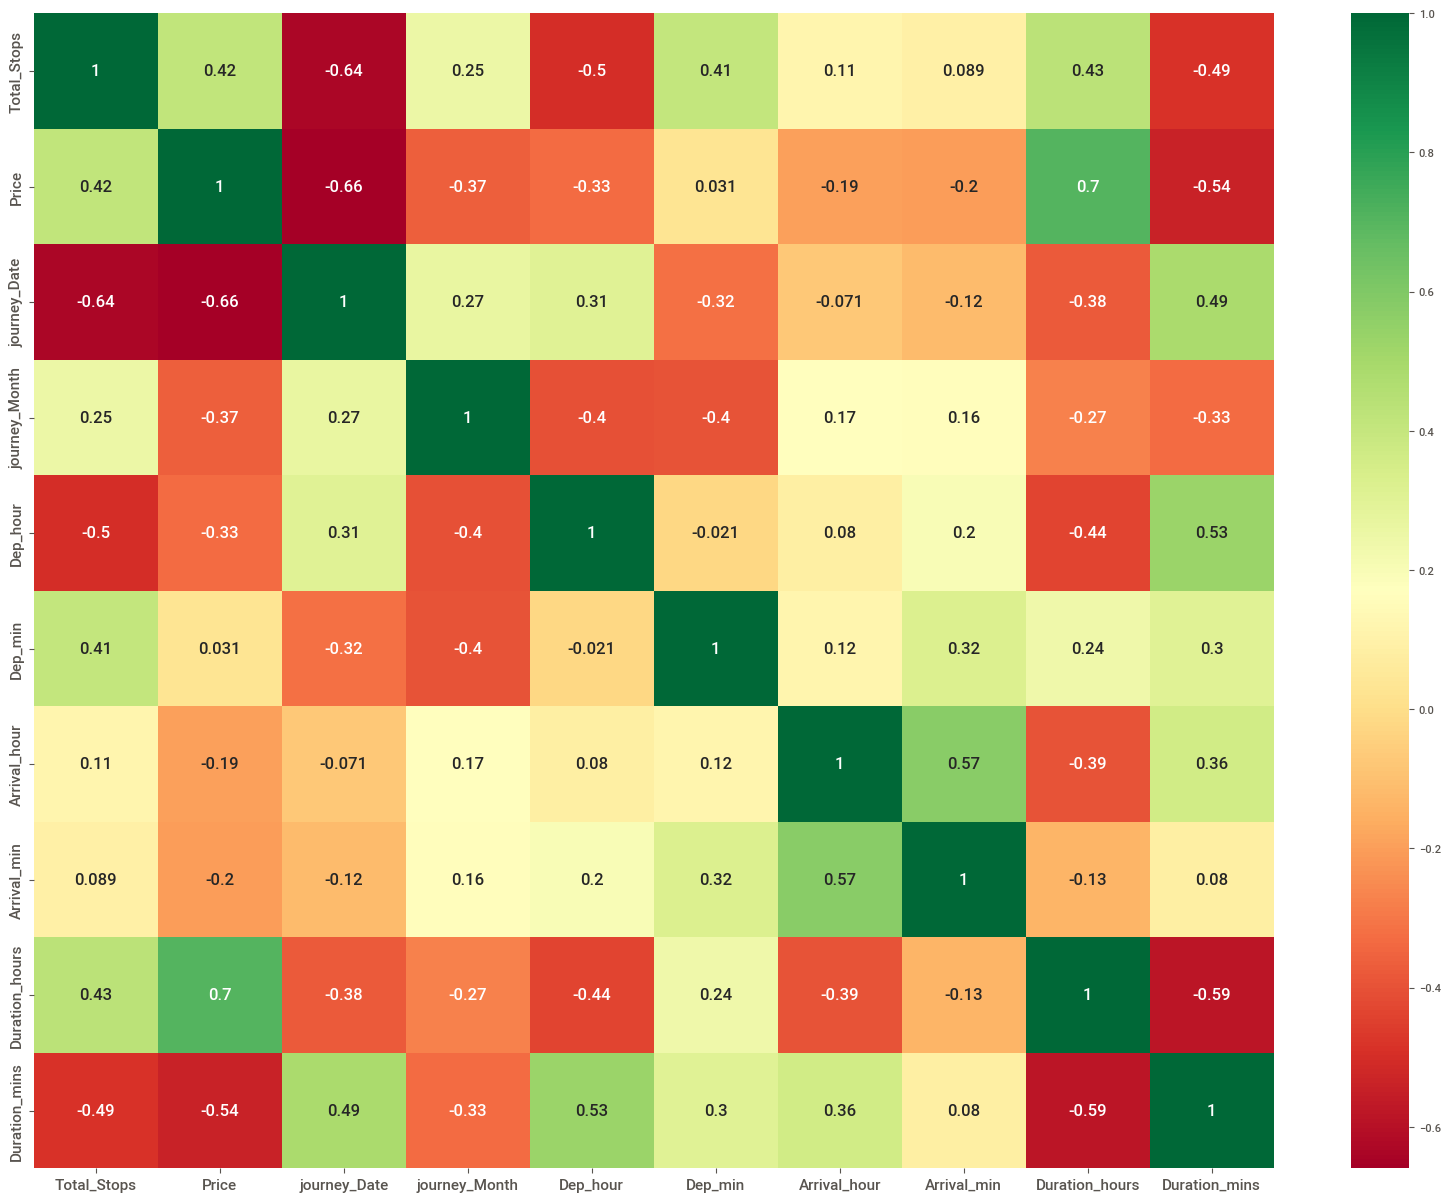

In [183]:
# Heatmap- to find the correlation between independent to independent and independent to dependent variables
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot = True, cmap = "RdYlGn")
plt.tick_params(labelsize=11)


### Insights
* we have to drop the column if the independent columns are highly related but we dont have any.
* We see that there are few cells which shows high correlation but thats between independent and dependent columns

## 9.MODEL CREATION

In [184]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]


In [185]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [186]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


## LINEAR REGRESSION

In [187]:
## importing the model library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [188]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [189]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


7835152.949901841
1949.458356115105


In [190]:
import math
rmse=math.sqrt(mae)
print(rmse)

44.15267099638599


In [191]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.6198931301596473

In [192]:
# adjusted r2 score
adj_r2=1-(1-lr_score)*(2671-1)/(2671-13-1)
adj_r2

0.6180333675296419

## KNN

In [193]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]


In [194]:
from sklearn.model_selection import train_test_split## splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [195]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [196]:
(y_test!=y_pred).sum()

2639

In [197]:
len(y_test)

2671

In [198]:
(y_test!=y_pred).sum()/len(y_test)

0.9880194683639086

In [199]:
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [200]:
ERROR_RATE

[0.7865967802321228,
 0.9183826282291276,
 0.9591913141145638,
 0.9790340696368401,
 0.9880194683639086,
 0.9962560838637214,
 0.9970048670909771,
 0.9992512167727443,
 0.9996256083863722,
 1.0,
 1.0,
 0.9996256083863722]

Text(0, 0.5, 'Error Rate')

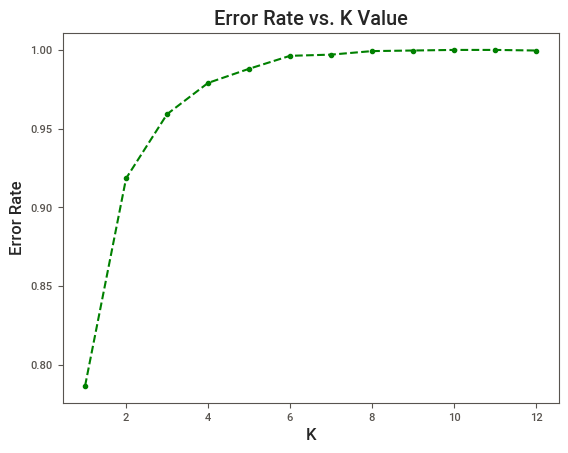

In [201]:
# Lets plot the k-value and error rate
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [202]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [203]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [204]:
mse=mean_squared_error(y_test,y_pred)
mse

8908715.681299139

In [205]:
mae=mean_absolute_error(y_test,y_pred)
mae

1845.3384500187196

In [206]:
knn_score=r2_score(y_test,y_pred)
knn_score

0.5678113683844929

In [207]:
adj_r2=1-(1-knn_score)*(2671-1)/(2671-13-1)
adj_r2

0.5656967834349251

## DECISION TREE

In [208]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]


In [209]:
from sklearn.model_selection import train_test_split# preparing training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [210]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(x_train,y_train)#training the model
y_pred=dt.predict(x_test)#prediction

In [211]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [212]:
mse=mean_squared_error(y_test,y_pred)
mse

5930858.2890817

In [213]:
mae=mean_absolute_error(y_test,y_pred)
mae

1350.9729190066143

In [214]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.7122762000762477

In [215]:
adj_r2=1-(1-dt_score)*(2671-1)/(2671-13-1)
adj_r2

0.7108684434337904

##  RANDOM FOREST 

In [216]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]


In [217]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [218]:
x.shape

(10682, 29)

In [219]:
y.shape

(10682,)

In [220]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [221]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [222]:
#Mean absolute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1159.2350776537098

In [223]:
#Mean Squared error
MSE=mean_squared_error(y_test,y_pred)
MSE

4118971.092235592

In [224]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

2029.524843956238

In [233]:
r2=r2_score(y_test,y_pred)
r2

0.8001763055752238

In [234]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.7991986209581662

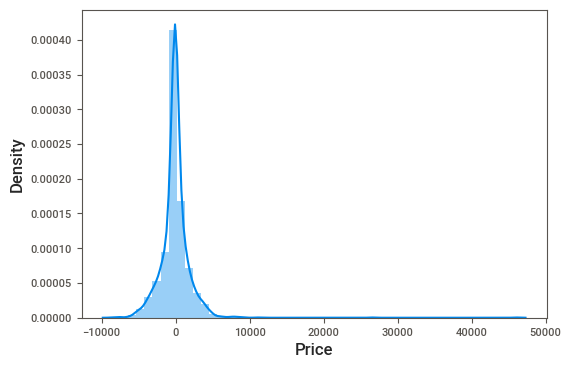

In [235]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

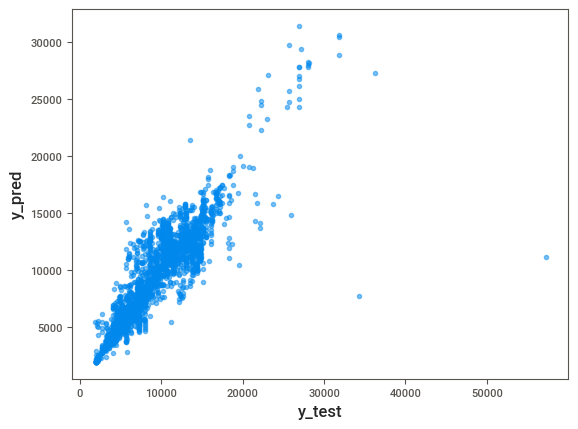

<Figure size 600x400 with 0 Axes>

In [236]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()


## HYPER PARAMETERTUNING

In [237]:
from sklearn.model_selection import RandomizedSearchCV


In [238]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [239]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [240]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [241]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [242]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [243]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 500,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [244]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [245]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1132.3857159768027

In [246]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3832499.572301327

In [247]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

1957.6770858089255

In [248]:
random_forest.score(x_train,y_train)

0.9109941911759742

In [249]:
random_forest.score(x_test,y_test)

0.8140739018872378

In [250]:
# R2 score
rf_score=metrics.r2_score(y_test,y_pred)
rf_score

0.8140739018872378

In [251]:
prediction=rf_random.predict(x_test)

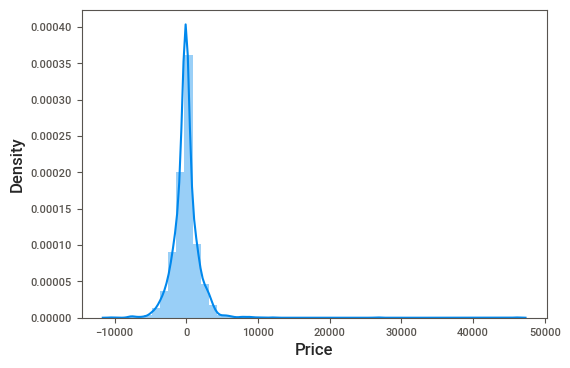

In [252]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()
            

### Insight:
* We see the normal distribution in the curve

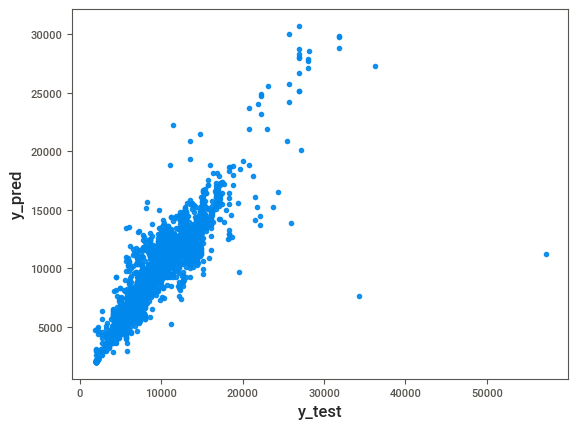

<Figure size 600x400 with 0 Axes>

In [253]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))

plt.show()

### Insight:
* We can see the observation in linearly scattered

## GRADIENT BOOSTING

In [254]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [255]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [256]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100) ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_hat=gbm.predict(x_test)#predicting the price


In [257]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [258]:
mse=mean_squared_error(y_test,y_hat)
mse

4306336.397248144

In [259]:
mae=mean_absolute_error(y_test,y_hat)
mae

1488.1156304342967

In [260]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.7910866502665936

In [261]:
adj_r2=1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.7900644923642473

## HYPER PARAMETERTUNINIG

In [272]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}


In [274]:
rsc=RandomizedSearchCV(estimator=gb_regressor,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [278]:
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [279]:
rsc.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [291]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 300,
                                         min_samples_split= 10,
                                         min_samples_leaf= 2,
                                         subsample= 0.9,
                                         learning_rate= 0.1,
                                         max_depth= 5)
gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)


In [292]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [293]:
mse=mean_squared_error(y_test,y_hat)
mse

3052127.0810980895

In [294]:
mae=mean_absolute_error(y_test,y_hat)
mae

1165.4653521509392

In [295]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.8519321219931385

## 10.RESULT

### Comparison of the Best Models Evaluated by Cross Validation

* LinearRegressor - CV: 0.61

* KNeighborsRegressor - CV: 0.56

* DecisionTreeRegressor - CV: 0.70

* RandomForestRegressor - CV: 0.81

* GradientBoostingRegressor - CV: 0.85


In [298]:
scores = [lr_score,knn_score,dt_score,rf_score,gbst_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.6198931301596473 %
The R2 score achieved using KNN is: 0.5678113683844929 %
The R2 score achieved using Decision Tree is: 0.7122762000762477 %
The R2 score achieved using Random Forest is: 0.8140739018872378 %
The R2 score achieved using Gradient Boosting is: 0.8519321219931385 %


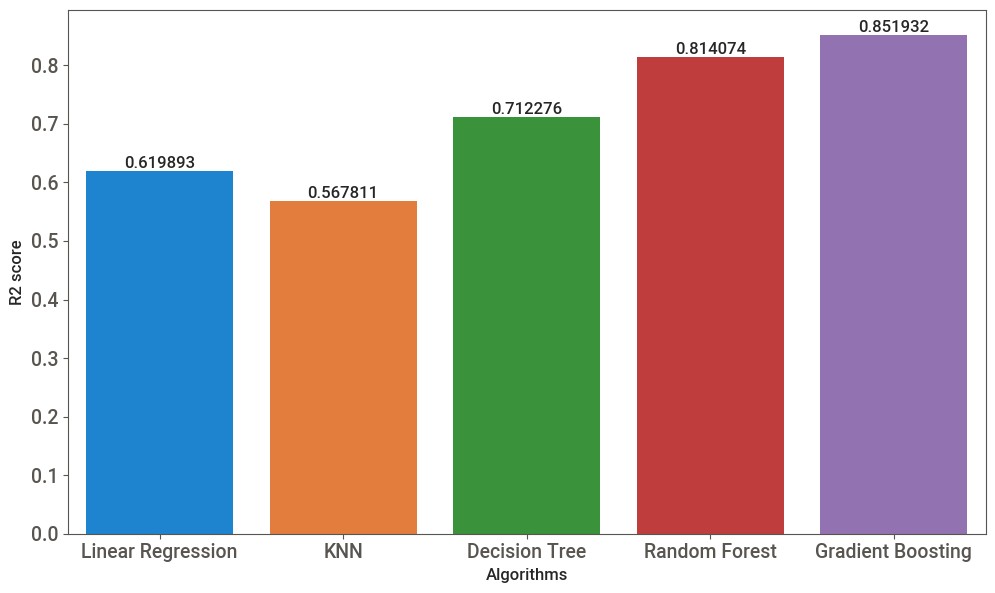

In [306]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Conclusion

* The best model is Gradient Boosting with a r2_score of 0.85.
* The second best model followed by Gradient Boosting is Random Forest with a r2_score   of 0.81.
* Some of the best features which has high impact on price are Total_Stops, Duration,Airline and Route.